# <center>L2 Computational Physics</center>
---

## Week 5: Monte Carlo Methods

In this notebook, you will simulate a system with of three nuclei $A$, $B$ and $C$ where $A$ decays into $B$ and $B$ decays into $C$. If exposed to a neutron flux nucleus $C$ can be activated into a nucleus $A$. 

In [1]:
import numpy
from matplotlib import pyplot as plt
import random

Implement a function that tells whether a transition has occured, based on the transition probability and a random number. Use the random number `r` from `random.random()` and use the procedure described in the notes so that the checks can work in a reproducible way.

In [2]:
def has_transitioned(prob):
    r = random.random()
    # YOUR CODE HERE
    if r <= prob:
        return True
    else:
        return False

In [3]:
# this test is worth 1 mark
random.seed(9867)
assert [ has_transitioned(0.5) for i in range(10)] == [False, False, True, False, False, False, False, True, False, True]

We are going to keep track of the state of the atoms using a either `'A'`, `'B'` or `'C'` for each nucleus. For example 
```python
state = ['A', 'A', 'B', 'A', 'C']
```

We will capture the possible physical reaction in a list of allowed transitions such as

`('A', 'B', 0.25 )`

where the first element is the initial state, the second element is the final state of the transition and its probability in the time interval considered is the third argument.

Define a function that takes as arguments the current state and a list of such transition rules and implements the transition (or not) and returns the new state

In [59]:

def evolveOne(currentState, rules):
    # YOUR CODE HERE
    for i in range(0, len(rules)):
        if currentState == rules[i][0]:
            r = random.random()
            if r <= rules[i][2]:
                return rules[i][1]
            else:
                return currentState
        if currentState != rules[len(rules)-1][0]:
            return currentState
        

In [60]:
evolveOne('A', testRules)

'B'

In [61]:
# these tests are worth 1 mark
alwaysDecayRules = [
    ('A', 'B', 1.0),
    ('B', 'C', 1.0)
]
assert evolveOne('A', alwaysDecayRules) == 'B'
assert evolveOne('B', alwaysDecayRules) == 'C'

In [62]:
# these tests are worth 2 mark
random.seed(112211)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'B'

assert evolveOne('B', testRules) == 'B'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'

# with no rules there should be no change
assert evolveOne('C', testRules) == 'C'


Now implement a function that takes a list of states and transition them according to the rules passed as argument. This function should return a new vector of states, it should not modify the state passed as an argument!

In [69]:
def evolveMany(states, rules):
    newState = []
    # YOUR CODE HERE
    for i in range(0, len(states)):
        newState.append(evolveOne(states[i], rules))

    return newState


In [70]:
# these tests are worth 1 mark
random.seed(112287)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
initialTestArray = ['A','B','C']*5
evolvedTest = evolveMany(initialTestArray, testRules)
targetArray = ['B', 'C', 'C', 'A', 'C', 'C', 'A', 'B', 'C', 'A', 'C', 'C', 'B', 'C', 'C'] 
assert evolvedTest == targetArray
# checks the initial array is left unchanged
assert initialTestArray == ['A','B','C']*5

Define a function that evolves a system that starts with initial amounts `NA`, `NB` and `NC` of $A$, $B$ and $C$ nuclei and evolved it in `n_timestep` from time $t=0$ to $t=t_{max}$. The function should return three arrays, one for each atom type, of the number of nuclei of that type at each time step. Each array should contain `n_timestep+1` elements including the initial amount. 
 

In [71]:
def evolve_system(NA, NB, NC, rules, n_step):
    state = (['A']*NA)+(['B']*NB)+(['C']*NC)
    print(state)
    A_count = [NA]
    B_count = [NB]
    C_count = [NC]
    
    evolve = state
    test = ['A', 'B', 'C']
    for i in range(1, n_step+1):
        evolve = evolveMany(evolve, rules)
        no_A= evolve.count('A')
        no_B = evolve.count('B')
        no_C = evolve.count('C')
        A_count.append(no_A)
        B_count.append(no_B)
        C_count.append(no_C)
    
    print(numpy.array(A_count), numpy.array(B_count), numpy.array(C_count))
    return numpy.array(A_count), numpy.array(B_count), numpy.array(C_count)

#needs to be fixed

In [72]:
# these tests are worth 2 marks
rules = [
    ('A', 'B', 0.0033),
    ('B', 'C', 0.0075),
    ('C', 'A', 0.009)
    
]

r1, r2, r3 = evolve_system(0,0,250, rules, 17)
assert len(r1) == 18
assert len(r2) == 18
assert len(r3) == 18

['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',

In [73]:
# these tests are worth 2 marks 
testrules = [
    ('A', 'B', 0.086),
    ('B', 'C', 0.075),
    ('C', 'A', 0.19)
    
]

random.seed(9485)
r1, r2, r3 = evolve_system(200,200,200, testrules, 20)
assert (r1 == [200, 213, 233, 250, 258, 251, 266, 263, 259, 260, 265, 259, 256,
        255, 258, 256, 259, 253, 249, 247, 253]).all()
assert (r2 == [200, 198, 201, 206, 205, 214, 214, 212, 216, 221, 225, 234, 236,
        238, 234, 235, 231, 245, 253, 256, 252]).all()
assert (r3 == [200, 189, 166, 144, 137, 135, 120, 125, 125, 119, 110, 107, 108,
        107, 108, 109, 110, 102,  98,  97,  95]).all()

['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A',

AssertionError: 

## Plotting tasks

Create a plot with the number of $A$, $B$ and $C$ nuclei, starting with 250 $C$ nuclei and evolving the system for 100 hours using 200 steps and with neutron flux on. Evolve the system for another 100 hours (using 200 steps) without neutron flux (i.e. no transitions from $C$ to $A$).  

The half life of the $A$ atoms is 10.1 hours, the half life of $B$ nuclei is 15.7 hours and we can caracterise the rate of activation of $C$ into $A$ when the neutron flux is on with and effective half-life of 3.2 hours.

The plot should have the appropriate labels and legend. [8 marks]    




['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C',

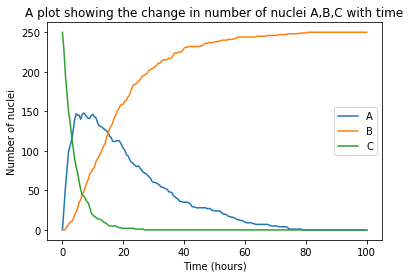

In [74]:
nsteps = 200
t_total = 100
t_half_A = 10.1
t_half_B = 15.7
t_half_C = 3.2
a_nuclei = []
b_nuclei = []
c_nuclei = []
time = numpy.arange(0, 100.5, 0.5)
decay_constant_a = numpy.log(2)/t_half_A
decay_constant_b = numpy.log(2)/t_half_B
decay_constant_c = numpy.log(2)/t_half_C
rules = [['C', 'A', decay_constant_c/2], ['C', 'B', decay_constant_c/2], ['B', 'A', decay_constant_b/2], ['A', 'B', decay_constant_a/2]]

a_nuclei.append(evolve_system(0,0,250, rules, 200)[0])
b_nuclei.append(evolve_system(0,0,250, rules, 200)[1])
c_nuclei.append(evolve_system(0,0,250, rules, 200)[2])


plt.plot(time, numpy.transpose(a_nuclei), label = 'A')
plt.plot(time, numpy.transpose(b_nuclei), label = 'B')
plt.plot(time, numpy.transpose(c_nuclei), label = 'C')
plt.xlabel('Time (hours)')
plt.ylabel('Number of nuclei')
plt.title('A plot showing the change in number of nuclei A,B,C with time')
plt.legend()

#need to check above function and also see if the rules used are correct

Run the above simulation 20 times with 200 steps and use the results to calculate an average and the uncertainty on the number of $A$ atoms as a function of time. Use and `errorbar` plot for it. You might be interested in the `numpy.average` and `numpy.std` functions. The plot should have axis labels and a title.  [3 marks]


['C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C']

[  0  24  37  49  68  78  84  95 102 109 110 109 114 116 120 122 123 121
 121 120 120 119 113 109 111 110 108 110 109  99  98  95  87  83  81  81
  77  76  72  70  67  65  61  58  58  57  55  53  52  51  46  45  43  41
  41  40  39  38  36  35  35  33  31  30  29  28  28  28  28  27  26  26
  24  24  24  23  23  21  20  20  19  16  16  14  14  14  12  10   9   9
   9   9   9   9   8   8   8   8   8   8   7   5   5   5   5   5   5   5
   5   3   3   3   3   3   3   3   3   3   3   3   3   3   3   2   2   2
   2   2   2   2   2   2   2   2   1   1   1   1   1   1   1   1   1   1
   1   1   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0] [  0   0   0   2   2   5  12  13  16  18  22  29  33  35  36  40  44  51
  53  55  58  61  67  73  75  78  82  84  87  97  99 102 110 114 116 117
 121 123 127 129 132 134 138 141 141 

[  0  19  36  57  68  85  96  99 108 115 119 120 120 118 120 118 119 118
 116 120 117 115 112 110 105 105 106 104 101  96  91  87  86  84  80  78
  75  75  75  70  69  67  63  64  62  61  61  57  55  53  54  52  50  49
  48  48  49  48  44  42  39  37  36  35  35  35  35  34  32  31  30  28
  25  23  23  20  19  19  19  17  16  15  14  14  14  13  13  13  13  12
  12  12  12  11  10  10  10   9   9   9   9   9   9   9   9   9   9   9
   9   9   9   9   8   7   7   7   7   7   7   7   6   6   6   6   6   5
   5   5   5   5   5   5   5   4   4   4   3   2   2   2   2   1   1   1
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0] [  0   0   1   4   6   8  11  16  20  21  26  33  40  45  49  55  55  58
  63  63  67  70  74  78  83  85  86  89  93  99 104 108 109 112 116 118
 121 122 122 127 128 130 134 134 136 

[  0  23  37  53  67  81  88 100 110 112 119 118 122 118 118 118 118 119
 118 118 114 113 109 106 105  99  98  93  91  88  83  80  77  77  76  74
  73  72  72  70  68  67  67  61  57  55  55  53  53  52  53  52  53  52
  50  49  47  43  41  39  37  36  36  35  34  32  30  30  30  30  30  30
  28  28  26  24  23  22  20  20  20  19  19  19  17  16  16  16  16  16
  16  15  15  14  13  13  13  13  12  11  11  10  10  10  10   9   8   8
   7   7   6   6   6   6   5   4   4   4   4   4   2   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0] [  0   0   0   4   6   7   8   9  10  15  18  22  25  32  39  43  46  49
  53  59  64  67  71  76  78  85  90  97 100 104 110 113 116 117 118 120
 122 123 124 126 128 129 130 136 140 

Text(0.5,1,'Average number of nuclei of A at a given time')

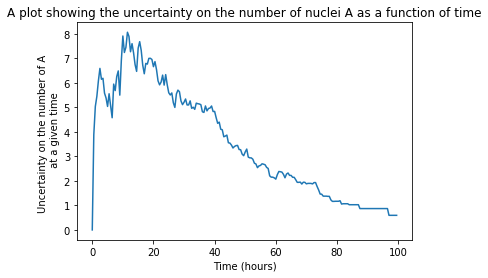

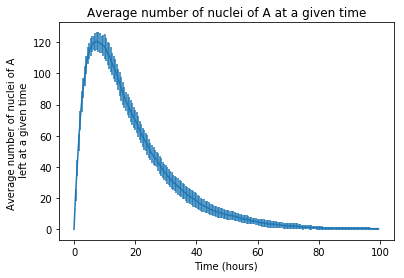

In [80]:
nsim = 20
average_A = numpy.array([])
time = numpy.arange(0, 100, 0.5)
totalA = []
averages = []
error = []
for i in range(0, nsim):
    evolveA, evolveB, evolveC = evolve_system(0, 0, 200, rules, 200)
    totalA.append(evolveA)
for j in range(0, 200):
    temptime = []
    for k in range(0, nsim-1):
        temptime.append(totalA[k][j])
    averages.append(numpy.average(temptime))
    error.append(numpy.std(temptime))
plt.figure()
plt.errorbar(time, error)
plt.xlabel('Time (hours)')
plt.ylabel('Uncertainty on the number of A \n at a given time')
plt.title('A plot showing the uncertainty on the number of nuclei A as a function of time')
plt.figure()
plt.errorbar(time, averages, yerr = error, capsize = 0.1, capthick = 0.1)
plt.xlabel('Time (hours)')
plt.ylabel('Average number of nuclei of A \n left at a given time')
plt.title('Average number of nuclei of A at a given time')

 
#why do you need an error bar plot for this?